In [1]:
using PyPlot, StatsBase, LaTeXStrings, Distributions, LinearAlgebra, SymEngine

Ejercicio 1. 

Datos. 

In [2]:
X_1 = [3.00 ,3.00 ,3.00 ,3.00 ,3.00 ,5.34 ,5.38 ,5.40 ,5.40 ,5.45 ,7.70 ,7.80 ,7.81 ,7.85 ,7.87  ,7.91  ,7.94  ,9.03  ,9.07    
    ,9.11 ,9.14 ,9.16 ,9.37 ,10.17 ,10.18,10.22,10.22,10.22,10.18,10.50,10.23,10.03,10.23]
Y = [2.60,2.67,2.66 ,2.78, 2.80, 5.92, 5.35, 4.33, 4.89, 5.21, 7.68, 9.81, 6.52, 9.71,9.82,9.81,8.50,9.47,11.45,12.14,11.50,  
    10.65,10.64,9.78,12.39,11.03,8.00,11.90,8.68,7.25,13.46,10.19,9.93]
X=hcat(repeat([1], inner=1, outer=length(X_1)), X_1)
P = X*inv(X'X)*X';

In [3]:
#Datos agrupados 
X1=X_1[1:5]
X2=X_1[6:10]
X3=X_1[11:17]
X4=X_1[18:23]
X5=X_1[24:33]
Y1=Y[1:5]
Y2=Y[6:10]
Y3=Y[11:17]
Y4=Y[18:23]
Y5=Y[24:33];

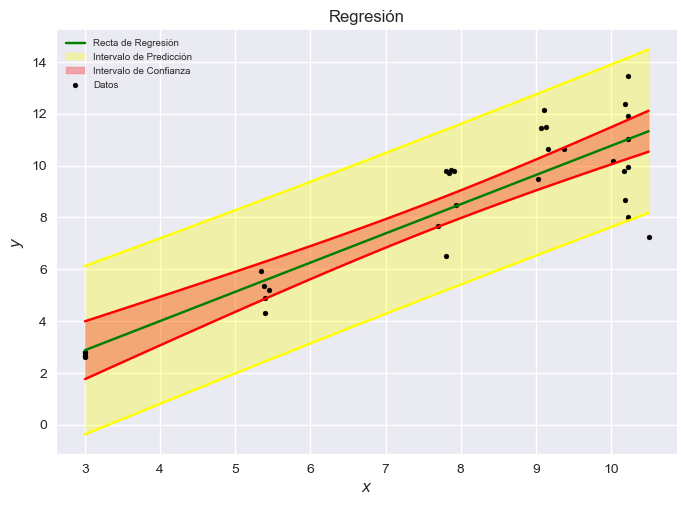

(-0.506, 1.127, 0.796)

In [4]:
##Minimos cuadrados 
β = ((X'*X)\X')*Y
##Valores ajustados
yG = X*β
##Residuales 
e = Y - yG
##R^2
n =length(Y)
p=2
SSReg= β'*X'*Y - n*mean(Y)^2 
SSTot= Y'*Y - n*mean(Y)^2
SSRes = SSTot - SSReg
σ2 = sqrt(SSRes/(n - p))
R21= SSReg/SSTot
##Bandas de confianza 
α = 0.05
A = inv(X'*X)
x0 = hcat(repeat([1], inner=1, outer=100),range(minimum(X_1),stop=maximum(X_1),length= 100))'
t = quantile(TDist(n-p),1 - α/2)
ConfBandsUp = x0'*β .+t.*σ2.*sqrt.([x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
ConfBandsLo = x0'*β .-t.*σ2.*sqrt.([x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
##Pred 
PredBandsUp = x0'*β .+t.*σ2.*sqrt.([1 + x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
PredBandsLo = x0'*β .-t.*σ2.*sqrt.([1 + x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])

plt.style.use("seaborn")

plot(x0[2,1:end],β[2].*x0[2,1:end] .+ β[1],color="green",label = "Recta de Regresión")
plot(x0[2,1:end],PredBandsUp,color = "yellow")
plot(x0[2,1:end],PredBandsLo,color = "yellow")
plot(x0[2,1:end],ConfBandsUp,color = "red")
plot(x0[2,1:end],ConfBandsLo,color = "red")
fill_between(x0[2,1:end],PredBandsUp,PredBandsLo,alpha=0.3,color="yellow", label = "Intervalo de Predicción")
fill_between(x0[2,1:end],ConfBandsUp,ConfBandsLo,alpha=0.3,color="red",label = "Intervalo de Confianza")
scatter(X_1,Y,marker = ".",label = "Datos",color = "BLack")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
grid("false")
legend(prop = Dict("size" => 7))
round.((β[1],β[2],R21),digits = 3)

In [5]:
##Residuales y ajustes agrupados
YG1=yG[1:5]
YG2=yG[6:10]
YG3=yG[11:17]
YG4=yG[18:23]
YG5=yG[24:33]
e1=e[1:5]
e2=e[6:10]
e3=e[11:17]
e4=e[18:23]
e5=e[24:33]
y1 = range(minimum(yG),stop = maximum(yG), length = 100)
y2 = range(minimum(Y),stop = maximum(Y), length = 100)
o1 = zeros(length(y1))
o2 = zeros(length(y2));

Grafica Residuos vs Valores ajustados

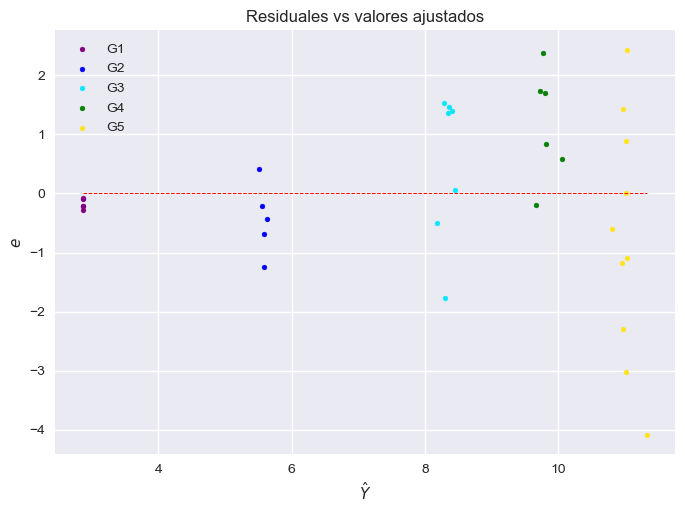

In [6]:
scatter(yG,e,marker = "")
plot(y1,o1,color = "red",linestyle = "dashed",linewidth = 0.7)
scatter(YG1,e1,marker = ".",color = "purple",label = "G1")
scatter(YG2,e2,marker = ".",color = "blue",label = "G2")
scatter(YG3,e3,marker = ".",color = "#06E7FF",label = "G3")
scatter(YG4,e4,marker = ".",color = "green",label = "G4")
scatter(YG5,e5,marker = ".",color = "#FFE31E",label = "G5")
ylabel(L"e")
xlabel(L"\hat{Y}")
title("Residuales vs valores ajustados")
legend()
;

Grafica de residuos vs variables independiente. 

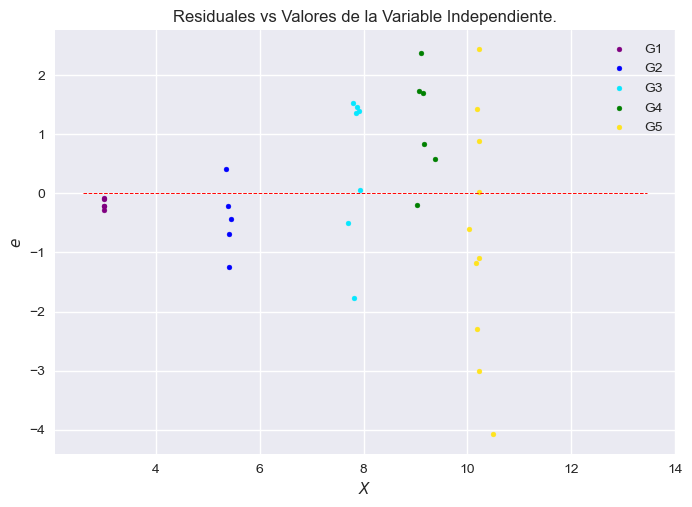

In [7]:
scatter(X_1,e,marker = "")
plot(y2,o2,color = "red",linestyle = "dashed",linewidth = 0.7)
scatter(X1,e1,marker = ".",color = "purple",label = "G1")
scatter(X2,e2,marker = ".",color = "blue",label = "G2")
scatter(X3,e3,marker = ".",color = "#06E7FF",label = "G3")
scatter(X4,e4,marker = ".",color = "green",label = "G4")
scatter(X5,e5,marker = ".",color = "#FFE31E",label = "G5")
xlabel(L"X")
ylabel(L"e")
title("Residuales vs Valores de la Variable Independiente.")
legend()
;

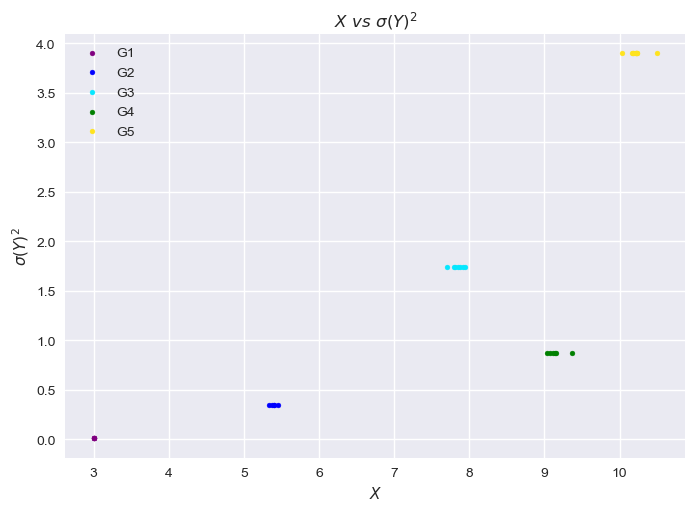

In [8]:
σ = vcat(repeat([var(Y1)],inner=1, outer=5),repeat([var(Y2)],inner=1, outer=5),repeat([var(Y3)],inner=1, outer=7),repeat([var(Y4)],inner=1, outer=6),repeat([var(Y5)],inner=1, outer=10));
s1=σ[1:5]
s2=σ[6:10]
s3=σ[11:17]
s4=σ[18:23]
s5=σ[24:33]
scatter(X_1,σ,marker = "")
scatter(X1,s1,marker = ".",color = "purple",label = "G1")
scatter(X2,s2,marker = ".",color = "blue",label = "G2")
scatter(X3,s3,marker = ".",color = "#06E7FF",label = "G3")
scatter(X4,s4,marker = ".",color = "green",label = "G4")
scatter(X5,s5,marker = ".",color = "#FFE31E",label = "G5")
xlabel(L"X")
ylabel(L"\sigma(Y)^2")
title(L"X \ vs \ \sigma(Y)^2")
legend();

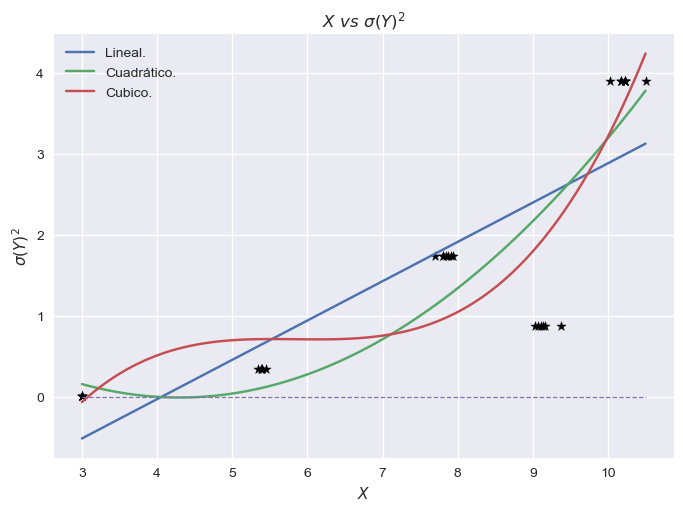

(Any[[-1.973, 0.485], 0.663], Any[[1.808, -0.847, 0.098], 0.776], Any[[-6.235, 3.588, -0.617, 0.035], 0.825])

In [9]:
x0=range(minimum(X_1),stop=maximum(X_1),length= 100)  

###Ajuste por MCO de polinomio 
lin = X 
cub = hcat(repeat([1], inner=1, outer=length(X_1)),X_1,X_1.^2,X_1.^3)
cua = hcat(repeat([1], inner=1, outer=length(X_1)),X_1,X_1.^2)

ρ0 = (lin'*lin)\lin'*σ
ρ1 = (cua'*cua)\cua'*σ
ρ2 = (cub'*cub)\cub'*σ

plot(x0,ρ0[1].+ρ0[2].*x0,label = "Lineal.")
plot(x0,ρ1[1].+ρ1[2].*x0.+ρ1[3].*x0.^2,label = "Cuadrático.")
plot(x0,ρ2[1].+ρ2[2].*x0.+ρ2[3].*x0.^2 .+ ρ2[4].*x0.^3, label = "Cubico.")
scatter(X_1,σ,marker = "*",color = "black")
plot(x0,repeat([0],inner = 1,outer= length(x0)),linewidth = 0.9,linestyle = "dashed")
xlabel(L"X")
ylabel(L"\sigma(Y)^2")
title(L"X \ vs \ \sigma(Y)^2")
legend()

###R^2 y coeficientes de pendiente 
([round.(ρ0, digits = 3),round((ρ0'*lin'*σ.- n*mean(σ)^2)/(σ'*σ - n*mean(σ)^2),digits = 3)],[round.(ρ1, digits = 3),round((ρ1'*cua'*σ- n*mean(σ)^2)/(σ'*σ - n*mean(σ)^2),digits = 3)],[round.(ρ2, digits = 3),round((ρ2'*cub'*σ- n*mean(σ)^2)/(σ'*σ - n*mean(σ)^2),digits = 3)])
###

 Los polinomios por ajustados por MCO arrojan pesos negativos, en el intervalo en el que caen las observaciones.

In [10]:
round.((minimum(ρ1[1].+ρ1[2].*x0.+ρ1[3].*x0.^2),minimum(ρ2[1].+ρ2[2].*x0.+ρ2[3].*x0.^2 .+ ρ2[4].*x0.^3)),digits = 3)

(-0.011, -0.067)

Para evitar esto y tomando en cuenta que entre mas covariables sean ingresadas al modelo de regresión lineal, más grande será el valor del coeficiente de determinación $R^2$, se decidio ajustar por MC dos modelos de la forma:
$f(x) = Ax^3,\quad f(x) = Bx^2.$

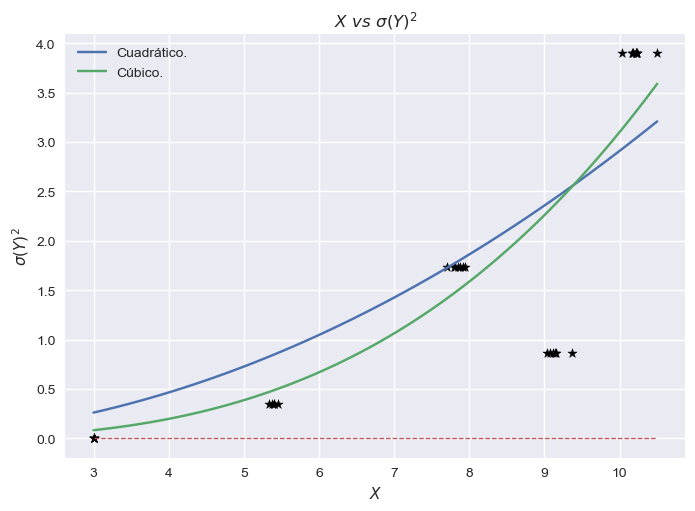

(("Cuadrática", (0.0291, 0.8666)), ("Cúbica", (0.0031, 0.9002)))

In [99]:
cub = X_1.^3
cua = X_1.^2

A = (cua'*cua)\cua'*σ
B = (cub'*cub)\cub'*σ

plot(x0,A.*x0.^2,label = "Cuadrático.")
plot(x0,B.*x0.^3,label = "Cúbico.")
scatter(X_1,σ,marker = "*",color = "black")
plot(x0,repeat([0],inner = 1,outer= length(x0)),linewidth = 0.9,linestyle = "dashed")
xlabel(L"X")
ylabel(L"\sigma(Y)^2")
title(L"X \ vs \ \sigma(Y)^2")
legend()
###R^2
r2cuad = (A.*cua'*σ)./(σ'*σ)
r2cub  = (B.*cub'*σ)./(σ'*σ)
##Análisis rápido 
(("Cuadrática", round.((A,r2cuad[1]), digits = 4)),("Cúbica",round.((B, r2cub[1]), digits = 4)))

Pesos X Grupo.

In [11]:
X1.^(-3)
X2.^(-3)
X3.^(-3)
X4.^(-3)
X5.^(-3);

10-element Array{Float64,1}:
 0.0009506860936593903
 0.0009478872158898596
 0.000936800928700973
 0.000936800928700973
 0.000936800928700973
 0.0009478872158898596
 0.0008638375985314761
 0.0009340563964776557
 0.0009910537312099175
 0.0009340563964776557

Mínimos Cuadrados Ponderados.

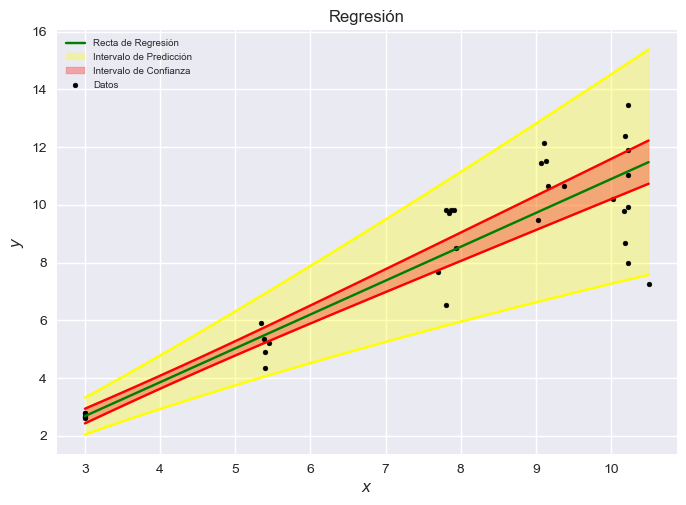

(-0.836, 1.173, 0.938)

In [12]:
W = Diagonal((X_1).^(-3))
K = sqrt.(W)
β= inv(X'*W*X)*(X'*W*Y)
SSReg= Y'*(W*X*inv(X'*W*X)*X'*W)*Y 
SSTot= Y'*W*Y
Yp = diag(W)'*Y./sum(diag(W))
SSTot2 = (Y .- Yp)'*W*(Y .- Yp) 
SSRes = SSTot - SSReg
σ2 = sqrt(SSRes/(n - p))
R21 = 1-(SSRes/SSTot2)
##Bandas de confianza 
α = 0.05
A = inv(X'*W*X)
x0 = hcat(repeat([1], inner=1, outer=100),range(minimum(X_1),stop=maximum(X_1),length= 100))'
t = quantile(TDist(n-p),1 - α/2)
ConfBandsUp = x0'*β .+t.*σ2.*sqrt.([x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
ConfBandsLo = x0'*β .-t.*σ2.*sqrt.([x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
##Pred 
PredBandsUp = x0'*β .+t.*σ2.*sqrt.([x0[1:end,i][2]^3 + x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])
PredBandsLo = x0'*β .-t.*σ2.*sqrt.([x0[1:end,i][2]^3 + x0[1:end,i]'*A*x0[1:end,i] for i ∈ 1:size(x0)[2]])

plot(x0[2,1:end],β[2].*x0[2,1:end] .+ β[1],color="green",label = "Recta de Regresión")
plot(x0[2,1:end],PredBandsUp,color = "yellow")
plot(x0[2,1:end],PredBandsLo,color = "yellow")
plot(x0[2,1:end],ConfBandsUp,color = "red")
plot(x0[2,1:end],ConfBandsLo,color = "red")
fill_between(x0[2,1:end],PredBandsUp,PredBandsLo,alpha=0.3,color="yellow", label = "Intervalo de Predicción")
fill_between(x0[2,1:end],ConfBandsUp,ConfBandsLo,alpha=0.3,color="red",label = "Intervalo de Confianza")
scatter(X_1,Y,marker = ".",label = "Datos",color = "BLack")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7))
round.((β[1],β[2],R21),digits = 3)



In [13]:
##Valores ajustados
yG1=X*β
##Residuales 
e1 =K*(Y - yG)
##Residuales y ajustes agrupados
YG11=yG1[1:5]
YG21=yG1[6:10]
YG31=yG1[11:17]
YG41=yG1[18:23]
YG51=yG1[24:33]
e11=e1[1:5]
e21=e1[6:10]
e31=e1[11:17]
e41=e1[18:23]
e51=e1[24:33]
y1 = range(minimum(yG1),stop = maximum(yG1), length = 100)
y2 = range(minimum(X_1),stop = maximum(X_1), length = 100)
o1 = zeros(length(y1))
o2 = zeros(length(y2));

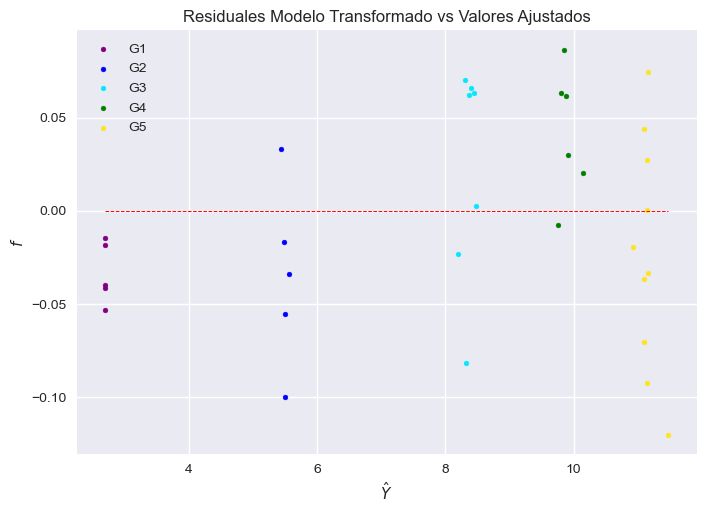

In [19]:
plt.style.use("seaborn")
scatter(yG1,e1,marker = "")
plot(y1,o1,color = "red",linestyle = "dashed",linewidth = 0.7)
scatter(YG11,e11,marker = ".",color = "purple",label = "G1")
scatter(YG21,e21,marker = ".",color = "blue",label = "G2")
scatter(YG31,e31,marker = ".",color = "#06E7FF",label = "G3")
scatter(YG41,e41,marker = ".",color = "green",label = "G4")
scatter(YG51,e51,marker = ".",color = "#FFE31E",label = "G5")
ylabel(L"f")
xlabel(L"\hat{Y}")
title("Residuales Modelo Transformado vs Valores Ajustados")
legend()
;

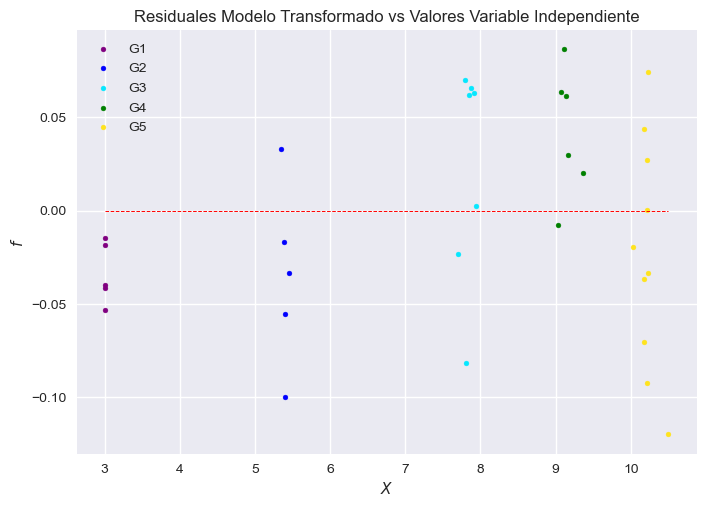

In [21]:
scatter(X_1,e1,marker = "")
plot(y2,o2,color = "red",linestyle = "dashed",linewidth = 0.7)
scatter(X1,e11,marker = ".",color = "purple",label = "G1")
scatter(X2,e21,marker = ".",color = "blue",label = "G2")
scatter(X3,e31,marker = ".",color = "#06E7FF",label = "G3")
scatter(X4,e41,marker = ".",color = "green",label = "G4")
scatter(X5,e51,marker = ".",color = "#FFE31E",label = "G5")
xlabel(L"X")
ylabel(L"f")
title("Residuales Modelo Transformado vs Valores Variable Independiente")
legend()
;

In [428]:
repeat([mean(Y)],inner=1, outer=length(Y))'*W*repeat([mean(Y)],inner=1, outer=length(Y))

16.596971750883377

$1 - \frac{(Z - Qb)'V^{-1}(Z - Qb)}{Y´Y - n \overline{Y}^2}$ = 0.99

Ejercicio 2

In [26]:
##Datos Ejercicio 
Datos    = [1   8.640    14.029     12.160    15.552   37.395;
            1   8.245     2.011     13.206     4.625   14.322;
            1   4.340     6.099     13.908     6.529   15.726;
            1   2.462    13.535      1.446    19.185   17.473;
            1   1.502     2.363      4.201     4.535    6.638;
            1   9.337     5.400      5.626    15.311   20.617;
            1   7.936     3.660      7.986    17.047   17.589;
            1   1.151     2.696     17.821     8.105    7.669;
            1   2.241    12.216     13.909     6.214   19.537;
            1   2.799    10.753     11.006     9.401   16.973;
            1   8.708    12.228      8.422    23.260   36.052;
            1   4.993     9.287      6.483     6.828   14.576;
            1   2.396     7.561     13.404    22.648   21.319;
            1   2.040     5.571     12.089    16.171   10.902;
            1   5.105     6.286     16.445     7.888   20.041;
            1   1.344     2.087     15.941    22.767   13.359;
            1   2.515     2.351     18.701     2.846    9.596;
            1   5.671     8.490     11.267    19.710   24.117;
            1   3.251    14.989      5.454    13.263   21.446;
            1   8.627     1.126     13.371    10.317   19.034]

20×6 Array{Float64,2}:
 1.0  8.64   14.029  12.16   15.552  37.395
 1.0  8.245   2.011  13.206   4.625  14.322
 1.0  4.34    6.099  13.908   6.529  15.726
 1.0  2.462  13.535   1.446  19.185  17.473
 1.0  1.502   2.363   4.201   4.535   6.638
 1.0  9.337   5.4     5.626  15.311  20.617
 1.0  7.936   3.66    7.986  17.047  17.589
 1.0  1.151   2.696  17.821   8.105   7.669
 1.0  2.241  12.216  13.909   6.214  19.537
 1.0  2.799  10.753  11.006   9.401  16.973
 1.0  8.708  12.228   8.422  23.26   36.052
 1.0  4.993   9.287   6.483   6.828  14.576
 1.0  2.396   7.561  13.404  22.648  21.319
 1.0  2.04    5.571  12.089  16.171  10.902
 1.0  5.105   6.286  16.445   7.888  20.041
 1.0  1.344   2.087  15.941  22.767  13.359
 1.0  2.515   2.351  18.701   2.846   9.596
 1.0  5.671   8.49   11.267  19.71   24.117
 1.0  3.251  14.989   5.454  13.263  21.446
 1.0  8.627   1.126  13.371  10.317  19.034

In [31]:
#Matriz de diseño
X=Datos[1:end,1:3]
#Valores de Z
Z=Datos[1:end,4:5]
#Variable Independiente
Y=Datos[1:end ,end];

In [32]:
round.(X,digits = 3)

20×3 Array{Float64,2}:
 1.0  8.64   14.029
 1.0  8.245   2.011
 1.0  4.34    6.099
 1.0  2.462  13.535
 1.0  1.502   2.363
 1.0  9.337   5.4
 1.0  7.936   3.66
 1.0  1.151   2.696
 1.0  2.241  12.216
 1.0  2.799  10.753
 1.0  8.708  12.228
 1.0  4.993   9.287
 1.0  2.396   7.561
 1.0  2.04    5.571
 1.0  5.105   6.286
 1.0  1.344   2.087
 1.0  2.515   2.351
 1.0  5.671   8.49
 1.0  3.251  14.989
 1.0  8.627   1.126

In [33]:
round.(Z,digits = 3)

20×2 Array{Float64,2}:
 12.16   15.552
 13.206   4.625
 13.908   6.529
  1.446  19.185
  4.201   4.535
  5.626  15.311
  7.986  17.047
 17.821   8.105
 13.909   6.214
 11.006   9.401
  8.422  23.26
  6.483   6.828
 13.404  22.648
 12.089  16.171
 16.445   7.888
 15.941  22.767
 18.701   2.846
 11.267  19.71
  5.454  13.263
 13.371  10.317

In [34]:
round.(Y,digits = 5)

20-element Array{Float64,1}:
 37.395
 14.322
 15.726
 17.473
  6.638
 20.617
 17.589
  7.669
 19.537
 16.973
 36.052
 14.576
 21.319
 10.902
 20.041
 13.359
  9.596
 24.117
 21.446
 19.034

In [79]:
##Son X y Z de rango completo 
(rank(X),rank(Z))
#🏁

(3, 2)

In [50]:
#Matriz completa
W = hcat(X, Z)
R = Matrix(I,size(X)[1],size(X)[1]) -   X*inv(X'X)*X'
RG = Matrix(I,size(W)[1],size(W)[1]) -   W*inv(W'W)*W'
L=inv(X'X)*(X'*Z)
M=inv(Z'*R*Z)
##COlumnas L.i
rank(W)

5

In [ ]:
## Parámetro modelo original
round.(β,digits=3)

In [42]:
round.(L,digits = 3)

3×2 Array{Float64,2}:
 15.587  8.074
 -0.267  0.309
 -0.448  0.433

In [44]:
round.(M,digits = 8) 

2×2 Array{Float64,2}:
 0.0030086   0.00022525
 0.00022525  0.00132795

In [45]:
RG

20×20 Array{Float64,2}:
  0.655971    -0.0631284    -0.061021    …  -0.113063    -0.0520304
 -0.0631284    0.738683     -0.107368        0.067277    -0.228264
 -0.061021    -0.107368      0.896815       -0.0343133   -0.0674491
  0.00891332   0.12977       0.0332583      -0.243256     0.121432
  0.2573      -0.080655     -0.0492683      -0.0836074   -0.0347191
 -0.0549924   -0.157864     -0.00438833  …  -0.00517668  -0.184267
 -0.00809819  -0.123777      0.00184019      0.0370147   -0.174903
  0.0532097   -0.0450733    -0.0989249       0.0311276   -0.0383849
 -0.149898    -0.000596623  -0.118981       -0.167236     0.0745576
 -0.0842833    0.00212245   -0.0782763      -0.147259     0.0470706
 -0.241163    -0.00990846    0.0168914   …  -0.082504    -0.0655077
 -0.0433958   -0.0877018    -0.0708801      -0.144334    -0.026462
 -0.0250283    0.100546      0.00897475     -0.0263006    0.0221023
  0.0499867    0.0342571    -0.0221251      -0.0286587   -0.00227067
 -0.125292    -0.114643     

In [46]:
R

20×20 Array{Float64,2}:
  0.735527    -0.0484982   -0.0243122  …  -0.0975576  -0.150684   -0.0425319
 -0.0484982    0.800719    -0.0564245     -0.0548165   0.0864225  -0.219703
 -0.0243122   -0.0564245    0.946662      -0.0445194  -0.0322633  -0.0579917
 -0.106635     0.0849823   -0.0375864     -0.0579154  -0.198953    0.104933
  0.108467    -0.041748    -0.0685883     -0.0145382   0.0158801  -0.044878
 -0.133108    -0.17899     -0.0454666  …  -0.0728985   0.0287931  -0.194369
 -0.069352    -0.170359    -0.052723      -0.058448    0.0504693  -0.186272
  0.111233    -0.0293652   -0.0684007     -0.0134971   0.0059024  -0.0308789
 -0.0786369    0.0724606   -0.0414554     -0.0521323  -0.174603    0.08995
 -0.0669975    0.0403662   -0.0441887     -0.0506557  -0.140033    0.0531609
 -0.235182    -0.0739775   -0.0288777  …  -0.0919346  -0.113954   -0.0722769
 -0.0948566   -0.0288539   -0.0437559     -0.0592279  -0.0899984  -0.0247618
 -0.00242805   0.00707529  -0.0532961     -0.0374708  -0.07

In [76]:
#Inciso i) y ii)
##Calculo con MC sin uso de teorema para delta
δ1 = (W'W)\W'*Y
## ii) Calculo de GammaG
γG = M*(Z'*R*Y)
## iii) Calculo Beta G por dos maneras distintas 
βG1 = (X'X)\X'*(Y - Z*γG)
#Para la segunda forma, se necesitará calcular el estimador para el modelo Y = Xβ + ϵ 
β = (X'X)\X'*Y
βG2 = β - L*γG
##
δ2=vcat(βG1,γG)
δ3=vcat(βG2,γG)
(round.(δ1,digits=3),round.(δ2,digits=3),round.(δ3,digits=3))

([-8.495, 1.672, 1.177, 0.531, 0.365], [-8.495, 1.672, 1.177, 0.531, 0.365], [-8.495, 1.672, 1.177, 0.531, 0.365])

In [54]:
#Inciso iii) y iv)  
a = Y'*RG*Y
b = (Y - Z*γG)'*R*(Y - Z*γG)
c = Y'*R*Y - γG'*Z'*R*Y
round.((a,b,c),digits=3)

(84.892, 84.892, 84.892)

In [67]:
#Inciso v)
covδ1 = round.(inv(W'W),digits = 4)

5×5 Array{Float64,2}:
  1.1835  -0.037   -0.0334  -0.0487  -0.0142
 -0.037    0.0065   0.0004   0.0007  -0.0004
 -0.0334   0.0004   0.0033   0.0013  -0.0005
 -0.0487   0.0007   0.0013   0.003    0.0002
 -0.0142  -0.0004  -0.0005   0.0002   0.0013

In [68]:
round.(inv(X'X) + L*M*L',digits = 4)

3×3 Array{Float64,2}:
  1.1835  -0.037   -0.0334
 -0.037    0.0065   0.0004
 -0.0334   0.0004   0.0033

In [71]:
round.( - L*M,digits = 4)

3×2 Array{Float64,2}:
 -0.0487  -0.0142
  0.0007  -0.0004
  0.0013  -0.0005

In [70]:
round.(M,digits = 4)

2×2 Array{Float64,2}:
 0.003   0.0002
 0.0002  0.0013

In [72]:
covδ2=round.(hcat(hcat(inv(X'X) + L*M*L', - L*M)',hcat(-M*L',M)'),digits=4)

5×5 Array{Float64,2}:
  1.1835  -0.037   -0.0334  -0.0487  -0.0142
 -0.037    0.0065   0.0004   0.0007  -0.0004
 -0.0334   0.0004   0.0033   0.0013  -0.0005
 -0.0487   0.0007   0.0013   0.003    0.0002
 -0.0142  -0.0004  -0.0005   0.0002   0.0013